In [1]:
# Importing the necessary libraries:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [2]:
# # Importing the data through the url
# DOWNLOAD_ROOT ="https://www.kaggle.com/fernandol/countries-of-the-world"
# COUNTRIES_PATH = os.path.join("datasets", "countries of the world")
# COUNTRIES_URL = DOWNLOAD_ROOT + "datasets/countries-of-the-world/countries.tgz"

In [3]:
# # function that will fetch the data:
# def fetch_countries_data(countries_url=COUNTRIES_URL, countries_path=COUNTRIES_PATH):
#     if not os.path.isdir(countries_path):
#         os.makeddirs(countries_path)
#     tgz_path = os.path.join(countries_path, "countries.tgz")
#     urllib.request.urlretrieve(countries_url, tgz_path)
#     countries_tgz = tarfile.open(tgz_path)
#     countries_tgz.extractall(path=countries_path)
#     countries_tgz.close()
        

In [4]:
# # function to load the dataset:
# def load_countries_data(countries_path=COUNTRIES_PATH):
#     csv_path = os.path.join(countries_path, "countries.csv")
#     return pd.read_csv(csv_path)

In [5]:
# # Read the structure of the data:
# countries_df = load_countries_data()
# countries_df.head()

In [6]:
# Manually reading the dataframe:
countries_df = pd.read_csv(r"C:\Users\tmmda\OneDrive\Desktop\Maxim Nyansa\CSV files\countries of the world.csv", decimal=',')

## Exploring the structure of the data

In [7]:
# quick look at the structure of the data:
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [9]:
# get the type:
type(countries_df)

pandas.core.frame.DataFrame

In [10]:
# Using the .shape to get the number of columns and rows:
countries_df.shape

(227, 20)

In [11]:
# categorizing region value_counts()
countries_df["Country"].value_counts()

Brazil                  1
Haiti                   1
West Bank               1
Monaco                  1
Lithuania               1
                       ..
Saint Kitts & Nevis     1
Montserrat              1
Brunei                  1
Samoa                   1
Barbados                1
Name: Country, Length: 227, dtype: int64

In [12]:
# View summary statistics:
countries_df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [13]:
# Checking for any missing values:
countries_df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

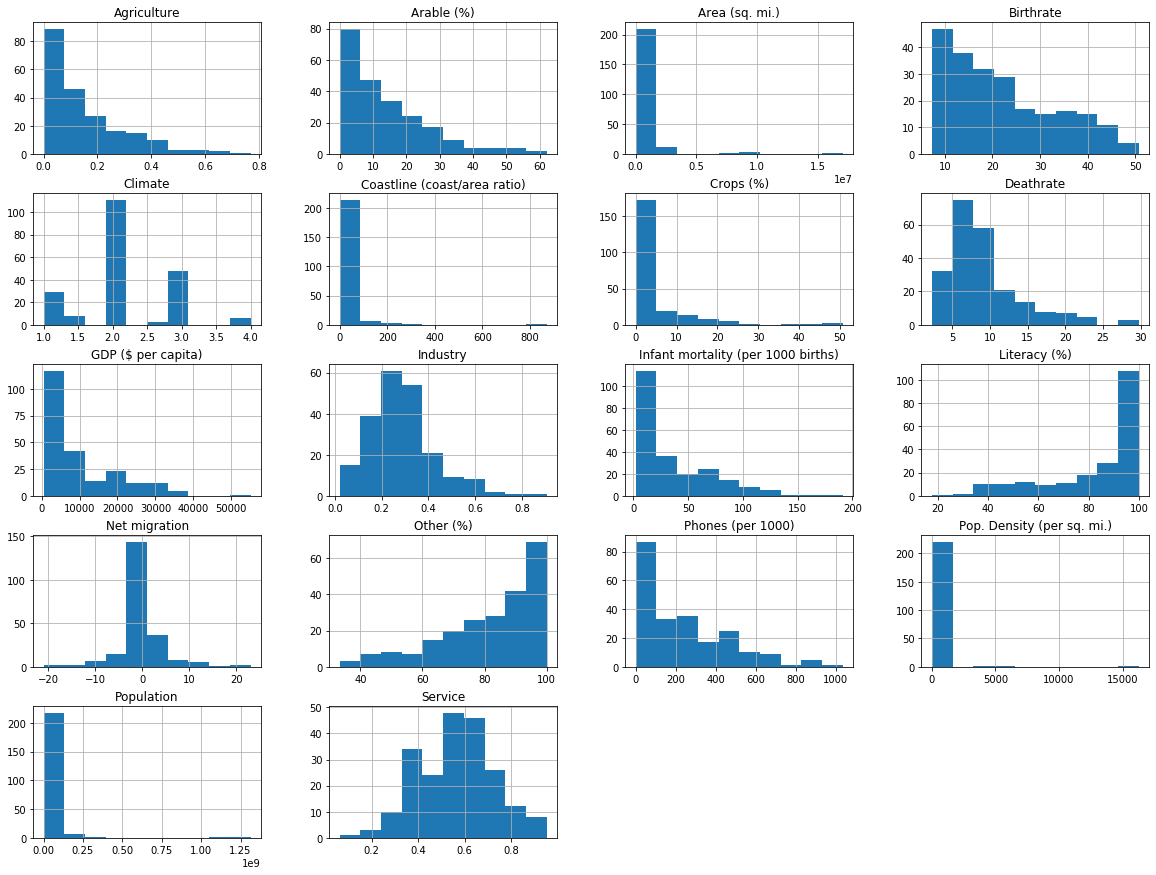

In [14]:
# summary graphs:
countries_df.hist(bins=10, figsize=(20, 15))
plt.show()

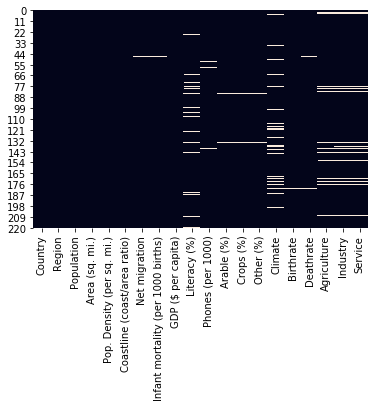

In [15]:
# visualizing missing values:
sns.heatmap(countries_df.isnull(), cbar=False);

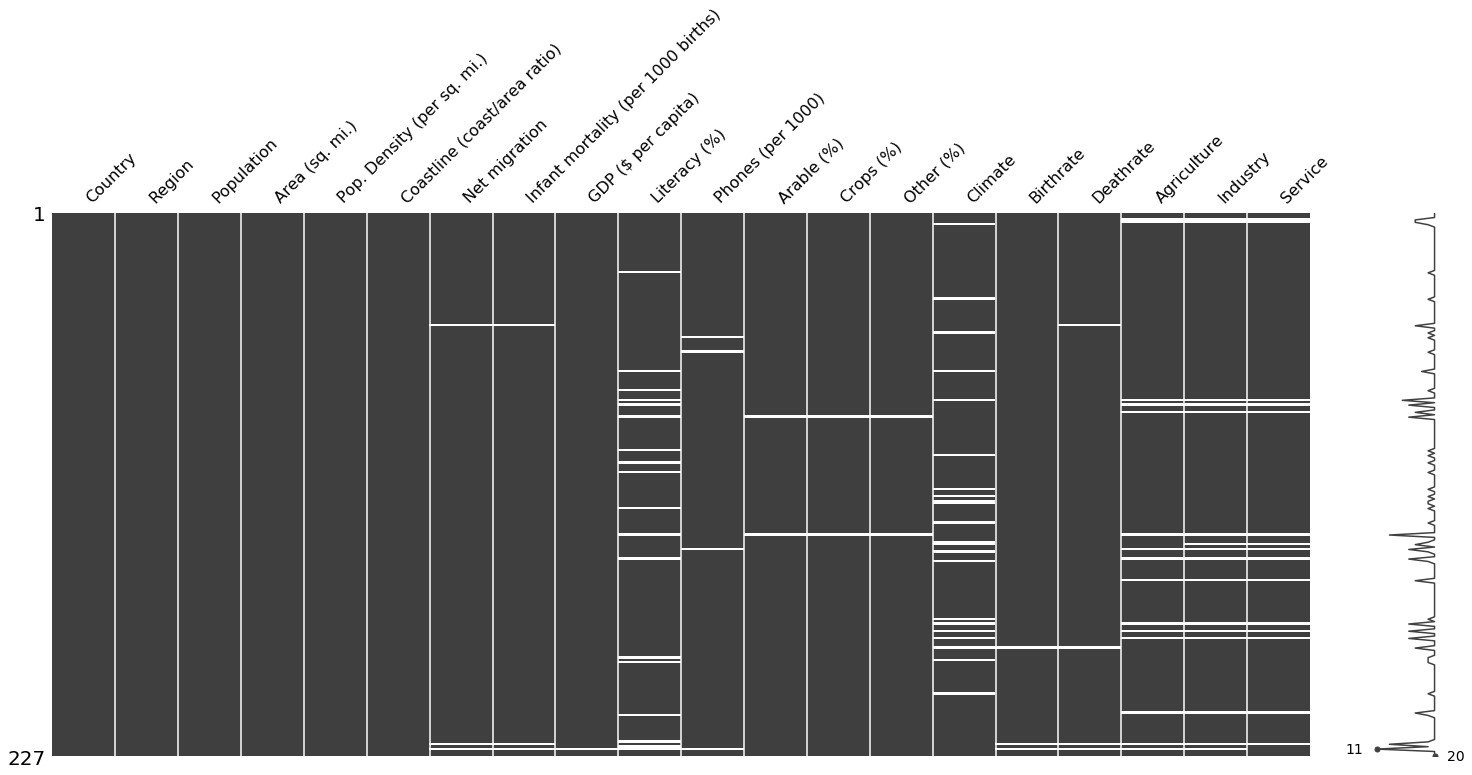

In [16]:
msno.matrix(countries_df);

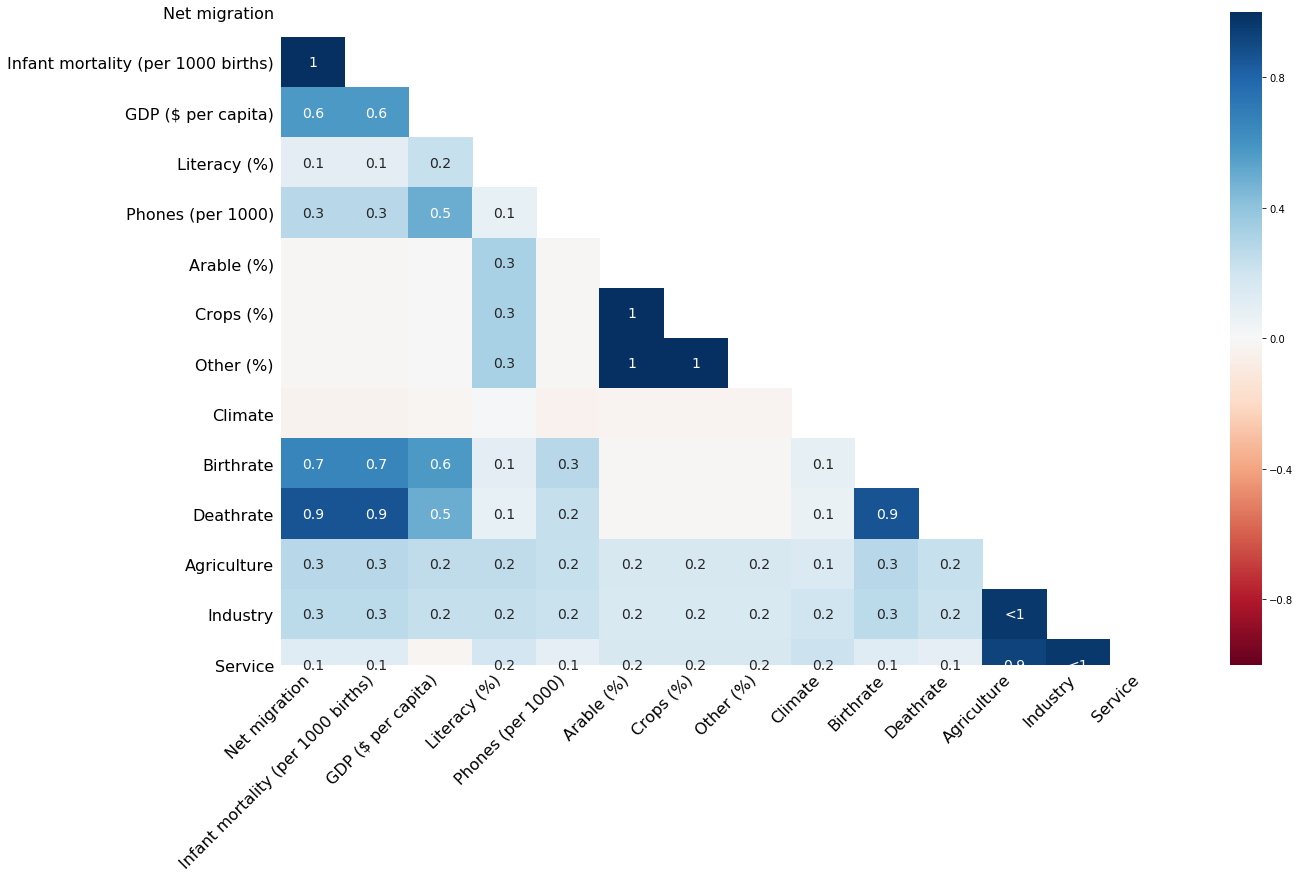

In [17]:
msno.heatmap(countries_df);

In [18]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [19]:
countries_df["Service"].value_counts()

0.684    5
0.620    4
0.550    4
0.579    3
0.549    3
        ..
0.260    1
0.540    1
0.197    1
0.699    1
0.615    1
Name: Service, Length: 167, dtype: int64

## Data cleaning

#### Filling the NaN series with the median values:

In [20]:
# Filling  the Net migration missing values with median value for each attributes/columns 
countries_df["Net migration"].fillna(countries_df['Net migration'].median(), inplace = True)

In [21]:
# Filling  the Infant mortality missing values with median value for each attributes/columns 
countries_df["Infant mortality (per 1000 births)"].fillna(countries_df['Infant mortality (per 1000 births)'].median(), inplace = True)

In [22]:
# Filling  the GDP ($ per capita) missing values with median value for each attributes/columns 
countries_df["GDP ($ per capita)"].fillna(countries_df['GDP ($ per capita)'].median(), inplace = True)

In [23]:
# Filling  the Literacy (%) missing values with median value for each attributes/columns 
countries_df["Literacy (%)"].fillna(countries_df['Literacy (%)'].median(), inplace = True)

In [24]:
# Filling  the Phones (per 1000) missing values with median value for each attributes/columns 
countries_df["Phones (per 1000)"].fillna(countries_df['Phones (per 1000)'].median(), inplace = True)

In [25]:
# Filling  the Arable (%) missing values with median value for each attributes/columns 
countries_df["Arable (%)"].fillna(countries_df['Arable (%)'].median(), inplace = True)

In [26]:
# Filling  the Crops (%) missing values with median value for each attributes/columns 
countries_df["Crops (%)"].fillna(countries_df['Crops (%)'].median(), inplace = True)

In [27]:
# Filling  the Arable (%) missing values with median value for each attributes/columns 
countries_df["Other (%)"].fillna(countries_df['Other (%)'].median(), inplace = True)

In [28]:
# Filling  the Climate missing values with median value for each attributes/columns 
countries_df["Climate"].fillna(countries_df['Climate'].median(), inplace = True)

In [29]:
# Filling  the Birthrate missing values with median value for each attributes/columns 
countries_df["Birthrate"].fillna(countries_df['Birthrate'].median(), inplace = True)

In [30]:
# Filling  the Deathrate missing values with median value for each attributes/columns 
countries_df["Deathrate"].fillna(countries_df['Deathrate'].median(), inplace = True)

In [31]:
# Filling  the Agriculture missing values with median value for each attributes/columns 
countries_df["Agriculture"].fillna(countries_df['Agriculture'].median(), inplace = True)

In [32]:
# Filling  the Industry missing values with median value for each attributes/columns 
countries_df["Industry"].fillna(countries_df['Industry'].median(), inplace = True)

In [33]:
# Filling  the Service missing values with median value for each attributes/columns 
countries_df["Service"].fillna(countries_df['Service'].median(), inplace = True)

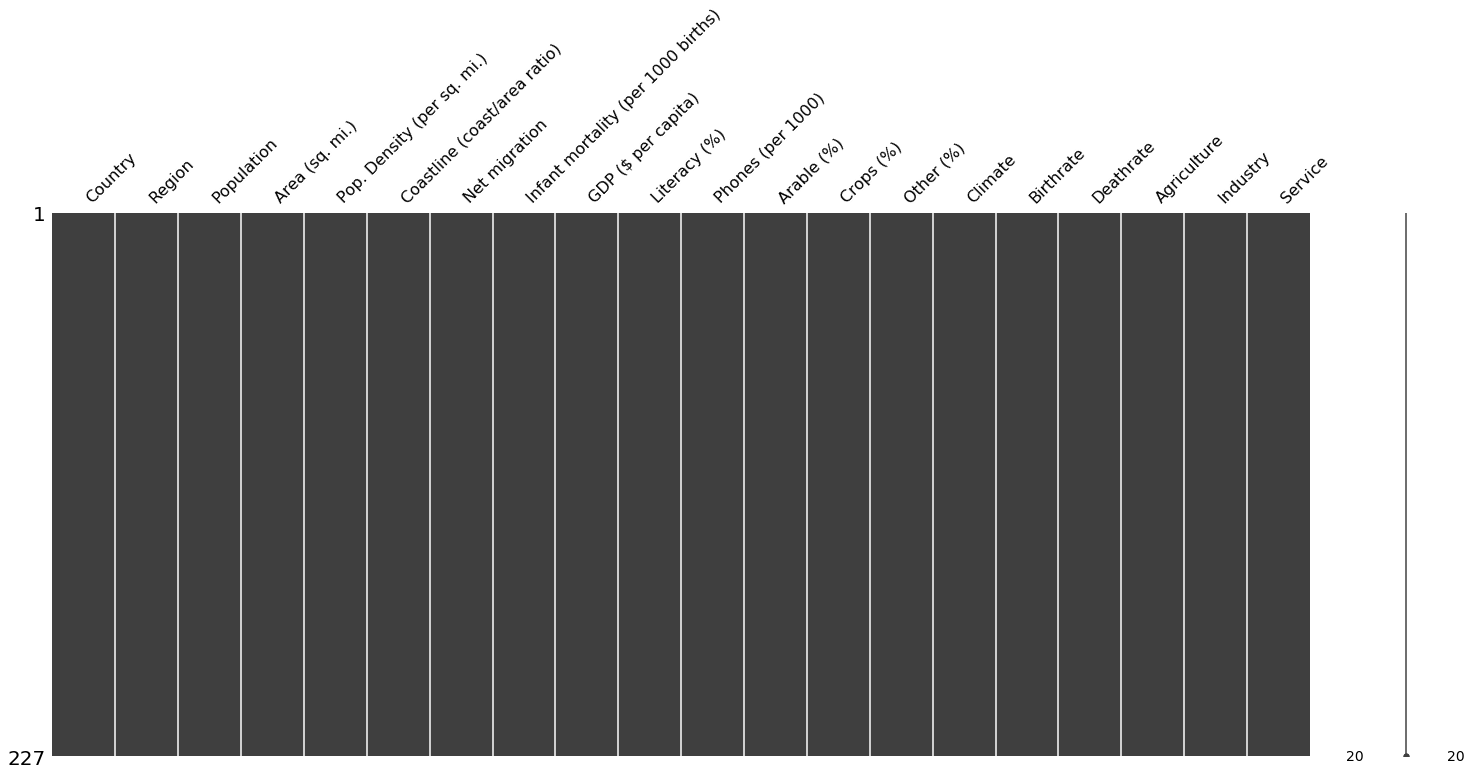

In [34]:
## visualizing after the filling the missing values:
msno.matrix(countries_df);

### General visualization using seaborn

In [35]:
countries_Vizcol = countries_df[['Population', 'Pop. Density (per sq. mi.)', 
                                 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 
                                 'Birthrate', 'Deathrate']]

In [36]:
countries_Vizcol.head()

,Population,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Birthrate,Deathrate
0,31056997,48.0,163.07,700.0,46.60,20.34
1,3581655,124.6,21.52,4500.0,15.11,5.22
2,32930091,13.8,31.00,6000.0,17.14,4.61
3,57794,290.4,9.27,8000.0,22.46,3.27
4,71201,152.1,4.05,19000.0,8.71,6.25


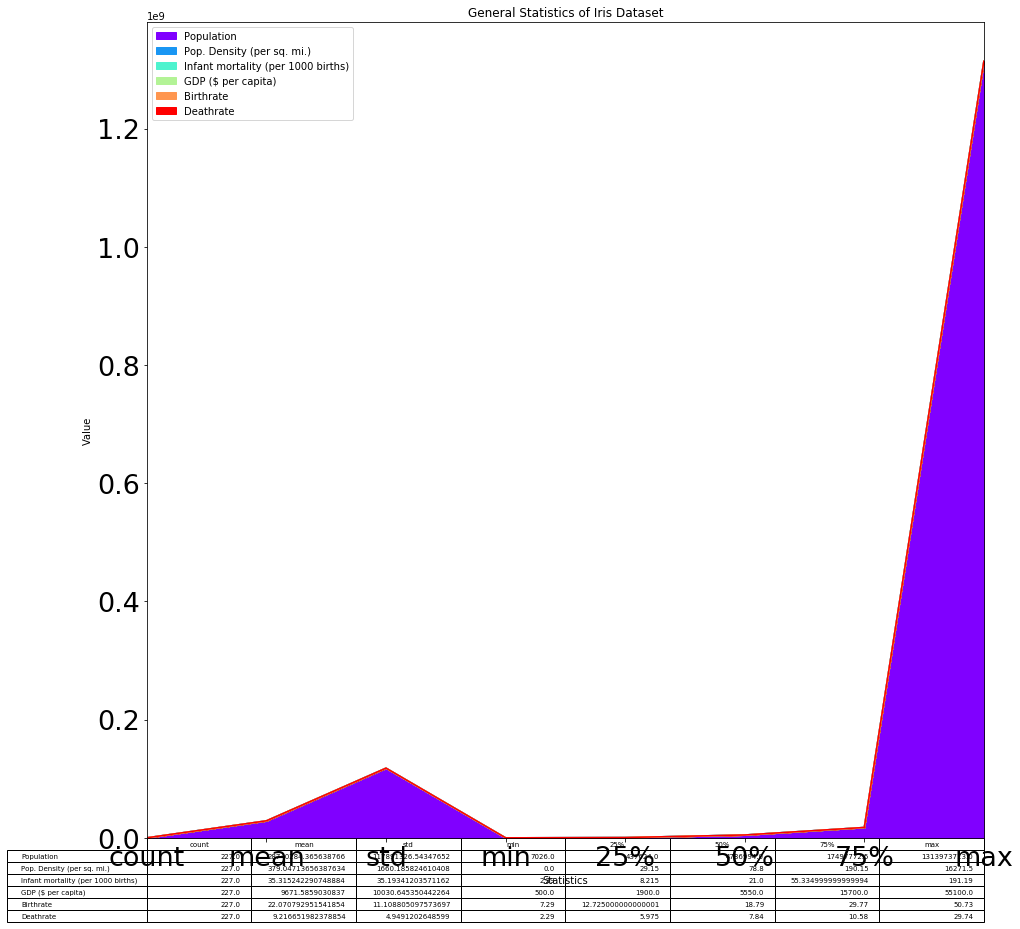

In [37]:
countries_Vizcol.describe().plot(kind = "area",fontsize=27, figsize = (15,15), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset");

In [38]:
# # Bar Plot : Here the frequency of the observation is plotted
# sns.countplot('Country',data=countries_df)
# plt.show()

#### Joint plot: * Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

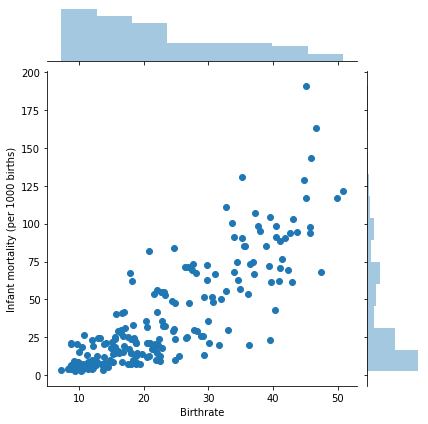

In [39]:
# jointplot showing the relationshipb/w Birthrate and Infant mortality (per 1000 births)
fig=sns.jointplot(x='Birthrate', y='Infant mortality (per 1000 births)',data=countries_df)

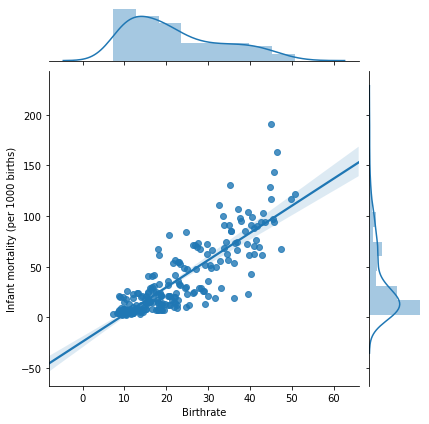

In [40]:
# jointplot showing the relationshipb/w Birthrate and Infant mortality (per 1000 births) with regression:
fig=sns.jointplot(x='Birthrate', y='Infant mortality (per 1000 births)',data=countries_df, kind='reg')

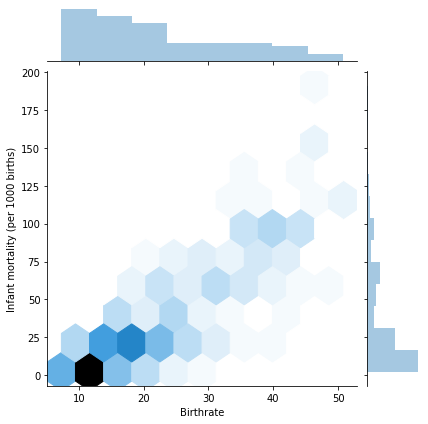

In [41]:
fig=sns.jointplot(x='Birthrate',y='Infant mortality (per 1000 births)', kind='hex',data=countries_df)

In [42]:
# # plotting FacetGrid:
# sns.FacetGrid(countries_df,hue='Country',size=5)\
# .map(plt.scatter,'GDP ($ per capita)','Population')\
# .add_legend();

In [43]:
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


### Prepare the Data for the Machine Learning Algorithms

In [44]:
# index = np.arange(len(country))
# plt.bar(index,population,align='center',alpha=0.5)
# plt.xticks(index,country);

In [45]:
# Selecting the necessary features for the ML
countries_Data = countries_df[['Population', 'Literacy (%)', 'Birthrate', 'Deathrate', 
                               'Agriculture', 'Industry', 'Service','GDP ($ per capita)']]

countries_Data

,Population,Literacy (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($ per capita)
0,31056997,36.0,46.60,20.34,0.380,0.240,0.380,700.0
1,3581655,86.5,15.11,5.22,0.232,0.188,0.579,4500.0
2,32930091,70.0,17.14,4.61,0.101,0.600,0.298,6000.0
3,57794,97.0,22.46,3.27,0.099,0.272,0.571,8000.0
4,71201,100.0,8.71,6.25,0.099,0.272,0.571,19000.0
...,...,...,...,...,...,...,...,...
222,2460492,92.5,31.67,3.92,0.090,0.280,0.630,800.0
223,273008,92.5,18.79,7.84,0.099,0.272,0.400,5550.0
224,21456188,50.2,42.89,8.30,0.135,0.472,0.393,800.0
225,11502010,80.6,41.00,19.93,0.220,0.290,0.489,800.0


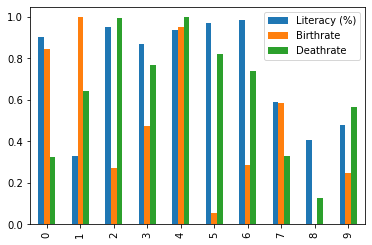

In [52]:
# plotting comparison of Literacy rate, Birth rate and Death rat
#  plot.bar() method produces a multiple bar plot:
df1 = pd.DataFrame(np.random.rand(10, 3), columns=['Literacy (%)','Birthrate', 'Deathrate'])

df1.plot.bar();

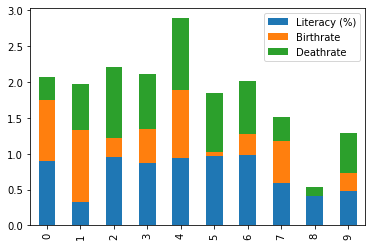

In [53]:
df1.plot.bar(stacked=True);

<Figure size 432x288 with 0 Axes>

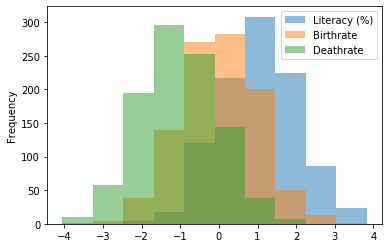

In [58]:
df2 = pd.DataFrame({'Literacy (%)': np.random.randn(1000) + 1, 'Birthrate': np.random.randn(1000),
                    'Deathrate': np.random.randn(1000) - 1}, columns=['Literacy (%)', 'Birthrate', 'Deathrate'])

plt.figure();

df2.plot.hist(alpha=0.5);

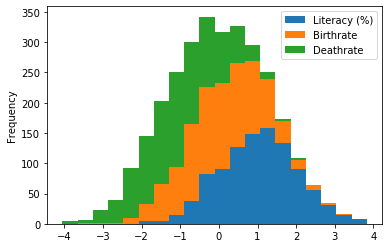

In [60]:
df2.plot.hist(stacked=True, bins=20);

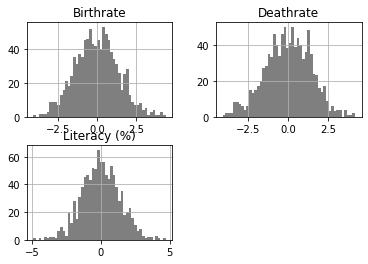

In [62]:
df2.diff().hist(color='k', alpha=0.5, bins=50);

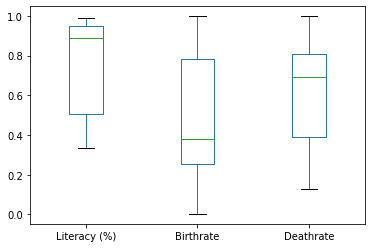

In [63]:
df1.plot.box();

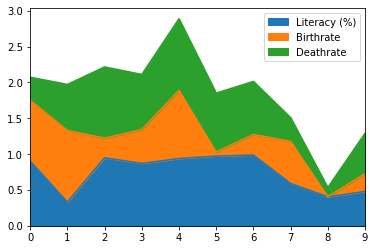

In [66]:
df1.plot.area();

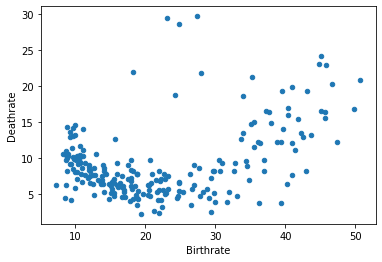

In [70]:
df3 = countries_Data[['Birthrate', 'Deathrate']]

df3.plot.scatter(x='Birthrate', y='Deathrate');

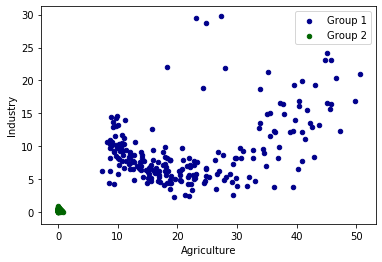

In [71]:
ax = countries_Data.plot.scatter(x='Birthrate', y='Deathrate', color='DarkBlue', label='Group 1');

countries_Data.plot.scatter(x='Agriculture', y='Industry', color='DarkGreen', label='Group 2', ax=ax);

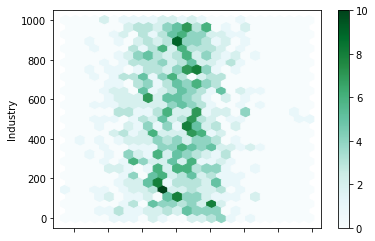

In [73]:
dfAg = pd.DataFrame(np.random.randn(1000, 2), columns=['Agriculture', 'Industry'])

dfAg['Industry'] = dfAg['Industry'] + np.arange(1000)

dfAg.plot.hexbin(x='Agriculture', y='Industry', gridsize=25);

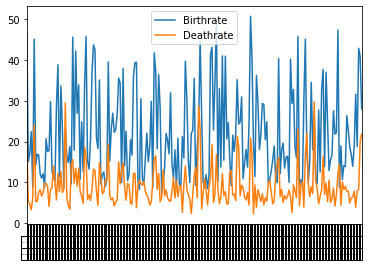

In [75]:
fig, ax = plt.subplots(1, 1)

ax.get_xaxis().set_visible(False)   # Hide Ticks

df3.plot(table=np.round(df3.T, 2), ax=ax);
